# Logistic Regression

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from logistic_regression import MultinomialLogisticRegression
from preprocess import Preprocess
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [12]:
raw_train_data = "../../data/train.csv"
raw_test_data = "../../data/test.csv"

In [13]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_train_data)

In [14]:
# cols = ['lat', 'TS', 'TMQ', 'U850', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'UBOT', 'T500',
#         "Label"]

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
# train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

train_df_norm = preproc.normalize_data(train_df.to_numpy())

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'lon_sin', 'lon_cos', 'PS-PSL', 'T200-T500', 'TREFHT-T200',
       'TREFHT-T500', 'U850-UBOT', 'V850-VBOT', 'Z200-Z1000', 'ZBOT-Z1000',
       'ZBOT-Z200', 'V850-U850', 'UBOT-VBOT', 'PS*PSL', 'T200*T500',
       'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT', 'V850*VBOT', 'Z200*Z1000',
       'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850', 'UBOT*VBOT', 'month', 'Label'],
      dtype='object')


### Training model

In [8]:
model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9774939248885908
Epoch 200, cross entropy loss: 0.972920866401118
Epoch 300, cross entropy loss: 0.9837783024688341
Epoch 400, cross entropy loss: 1.000031284845685
Epoch 500, cross entropy loss: 1.018611341271762
Epoch 600, cross entropy loss: 1.038179766627913
Epoch 700, cross entropy loss: 1.0580245104286463
Epoch 800, cross entropy loss: 1.0777375380597884
Epoch 900, cross entropy loss: 1.0970853993862166
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'lon_sin', 'lon_cos', 'PS-PSL', 'T200-T500', 'TREFHT-T200',
       'TREFHT-T500', 'U850-UBOT', 'V850-VBOT', 'Z200-Z1000', 'ZBOT-Z1000',
       'ZBOT-Z200', 'V850-U850', 'UBOT-VBOT', 'PS*PSL', 'T200*T500',
       'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT', 'V850*VBOT', 'Z200*Z1000',
       'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850', 'UBOT*VBOT', '

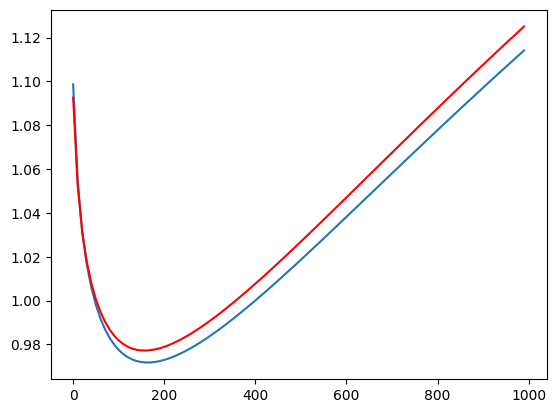

In [10]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

This has a lot of error. Let's limit the number of iterations.

In [11]:
model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=150, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9774939248885908
Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'lon_sin', 'lon_cos', 'PS-PSL', 'T200-T500', 'TREFHT-T200',
       'TREFHT-T500', 'U850-UBOT', 'V850-VBOT', 'Z200-Z1000', 'ZBOT-Z1000',
       'ZBOT-Z200', 'V850-U850', 'UBOT-VBOT', 'PS*PSL', 'T200*T500',
       'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT', 'V850*VBOT', 'Z200*Z1000',
       'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850', 'UBOT*VBOT', 'month', 'Label'],
      dtype='object')
Confusion Matrix:
[[6868 2792 1969]
 [ 105  466    7]
 [ 664  422 1478]] 

Accuracy:
0.5966 

Precision:
0.4846 

Recall:
0.6578 

F1 Score:
0.5581


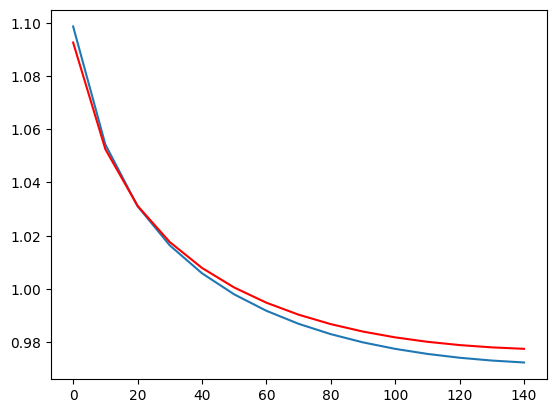

In [12]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

This has a lot of error. Let's remove some columns based on their weights.

In [41]:
cols = ['lat', 'TS', 'TMQ', 'U850', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'UBOT', 'T500',"SNo", "time",
        "Label"]

raw_data_sel = raw_data[cols]
train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

train_df_norm = preproc.normalize_data(train_df.to_numpy())

model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'lon_sin', 'lon_cos', 'PS-PSL', 'T200-T500', 'TREFHT-T200',
       'TREFHT-T500', 'U850-UBOT', 'V850-VBOT', 'Z200-Z1000', 'ZBOT-Z1000',
       'ZBOT-Z200', 'V850-U850', 'UBOT-VBOT', 'PS*PSL', 'T200*T500',
       'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT', 'V850*VBOT', 'Z200*Z1000',
       'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850', 'UBOT*VBOT', 'month', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9774939248885908
Epoch 200, cross entropy loss: 0.972920866401118
Epoch 300, cross entropy loss: 0.9837783024688341
Epoch 400, cross entropy loss: 1.000031284845685
Epoch 500, cross entropy loss: 1.018611341271762
Epoch 600, cross entropy loss: 1.038179766627913
Epoch 700, cross entropy loss: 1.0580245104286463
Epoch 800, cross entropy loss: 1.0777375380597884
Epoch 900,

Retrieveing the features absolute weights

In [42]:
weights = pd.DataFrame(model.weights, index=['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'lon_sin', 'lon_cos', 'PS-PSL', 'T200-T500', 'TREFHT-T200',
       'TREFHT-T500', 'U850-UBOT', 'V850-VBOT', 'Z200-Z1000', 'ZBOT-Z1000',
       'ZBOT-Z200', 'V850-U850', 'UBOT-VBOT', 'PS*PSL', 'T200*T500',
       'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT', 'V850*VBOT', 'Z200*Z1000',
       'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850', 'UBOT*VBOT', 'month',], columns=[0,1,2])
weights.abs().sort_values(by=[0], ascending=False)

,0,1,2
lat,0.324961,0.013771,0.338733
U850-UBOT,0.131747,0.025141,0.156888
U850,0.155688,0.004743,0.150945
U850*UBOT,0.383028,0.233948,0.149080
UBOT*VBOT,0.183823,0.042095,0.141729
TMQ,0.192941,0.075634,0.117307
V850-U850,0.115491,0.001807,0.117298
TS,0.145043,0.028938,0.116105
V850*VBOT,0.315058,0.209997,0.105061
lon_cos,0.052749,0.026765,0.079514


Let's train the model again.

Index(['lat', 'lon', 'TMQ', 'U850', 'V850', 'UBOT', 'VBOT', 'QREFHT', 'PS',
       'PSL', 'T200', 'T500', 'PRECT', 'TS', 'TREFHT', 'Z1000', 'Z200', 'ZBOT',
       'lon_sin', 'lon_cos', 'PS-PSL', 'T200-T500', 'TREFHT-T200',
       'TREFHT-T500', 'U850-UBOT', 'V850-VBOT', 'Z200-Z1000', 'ZBOT-Z1000',
       'ZBOT-Z200', 'V850-U850', 'UBOT-VBOT', 'PS*PSL', 'T200*T500',
       'TREFHT*T200', 'TREFHT*T500', 'U850*UBOT', 'V850*VBOT', 'Z200*Z1000',
       'ZBOT*Z1000', 'ZBOT*Z200', 'V850*U850', 'UBOT*VBOT', 'month', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9774939248885908
Epoch 200, cross entropy loss: 0.972920866401118
Epoch 300, cross entropy loss: 0.9837783024688341
Epoch 400, cross entropy loss: 1.000031284845685
Epoch 500, cross entropy loss: 1.018611341271762
Epoch 600, cross entropy loss: 1.038179766627913
Epoch 700, cross entropy loss: 1.0580245104286463
Epoch 800, cross entropy loss: 1.0777375380597884
Epoch 900,

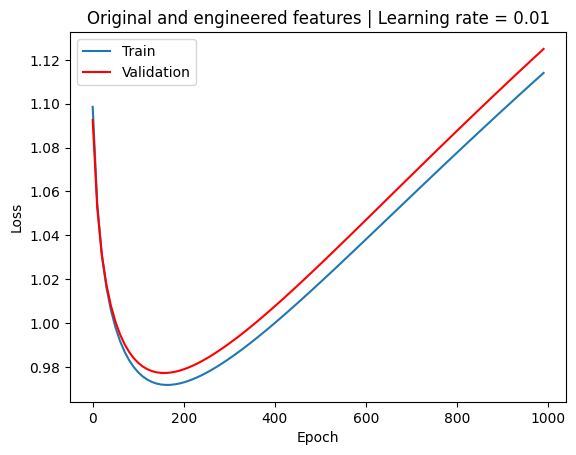

In [9]:
# raw_data_sel = raw_data[cols]
train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

train_df_norm = preproc.normalize_data(train_df.to_numpy())

model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

plt.plot(
    model.iters,
    model.train_errors,
    label="Train"
)

plt.plot(
    model.iters,
    model.valid_errors,
    label="Validation",
    color='r'
)

plt.ylabel("Loss")
plt.title("Original and engineered features | Learning rate = 0.01")
plt.xlabel("Epoch")
plt.legend()
plt.show()

This has a lot of error. Let's keep removing some columns based on their weights.

In [47]:
cols = ['lat', 'TS', 'TMQ',  'PS', "U850", "UBOT", 'Z1000', 'PSL', 'Z200', 'lon', 'T500', "U850*UBOT", "U850-UBOT", 
        "Label"]

train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

train_df_norm = preproc.normalize_data(train_df.to_numpy())

model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Index(['lat', 'TS', 'TMQ', 'PS', 'U850', 'UBOT', 'Z1000', 'PSL', 'Z200', 'lon',
       'T500', 'U850*UBOT', 'U850-UBOT', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 1.0427847606563758
Epoch 200, cross entropy loss: 1.0279644018344063
Epoch 300, cross entropy loss: 1.0202816571738655
Epoch 400, cross entropy loss: 1.0171292624851365
Epoch 500, cross entropy loss: 1.0174792042959293
Epoch 600, cross entropy loss: 1.0206398382030109
Epoch 700, cross entropy loss: 1.0260777718466998
Epoch 800, cross entropy loss: 1.033372769010684
Epoch 900, cross entropy loss: 1.0421957426993054
Index(['lat', 'TS', 'TMQ', 'PS', 'U850', 'UBOT', 'Z1000', 'PSL', 'Z200', 'lon',
       'T500', 'U850*UBOT', 'U850-UBOT', 'Label'],
      dtype='object')
Confusion Matrix:
[[5585 2311 3733]
 [  73  488   17]
 [ 232  139 2193]] 

Accuracy:
0.5596 

Precision:
0.4944 

Recall:
0.7266 

F1 Score:
0.5885


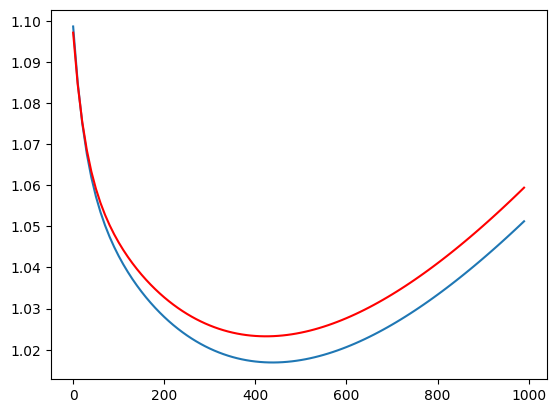

In [48]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Removing more columns

In [15]:
cols = ['lat', 'TS', 'TMQ',  'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'T500', "U850*UBOT", "U850-UBOT", 
        "Label"]
raw_data = preproc.load_data(raw_train_data)
train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=0.33 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
X_valid = preproc.normalize_data(X_valid)

train_df_norm = preproc.normalize_data(train_df.to_numpy())

model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_valid, valid_y=y_valid)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_valid, predictions, return_values=False)

Index(['lat', 'TS', 'TMQ', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'T500',
       'U850*UBOT', 'U850-UBOT', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681096
Epoch 100, cross entropy loss: 0.9612548810019955
Epoch 200, cross entropy loss: 0.8915496476984809
Epoch 300, cross entropy loss: 0.8475207155184781
Epoch 400, cross entropy loss: 0.8187143091739096
Epoch 500, cross entropy loss: 0.7994493976649334
Epoch 600, cross entropy loss: 0.7863722494915486
Epoch 700, cross entropy loss: 0.7774216404097869
Epoch 800, cross entropy loss: 0.7712832799452163
Epoch 900, cross entropy loss: 0.7670912566496082
Index(['lat', 'TS', 'TMQ', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'T500',
       'U850*UBOT', 'U850-UBOT', 'Label'],
      dtype='object')
Confusion Matrix:
[[10156   674   799]
 [  247   331     0]
 [ 1397   222   945]] 

Accuracy:
0.7739 

Precision:
0.5574 

Recall:
0.6049 

F1 Score:
0.5802


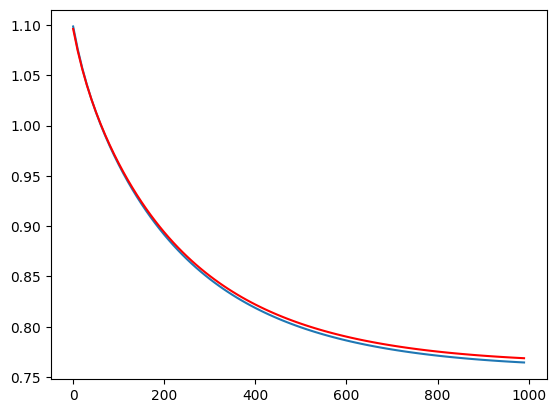

In [55]:
plt.plot(
    model.iters,
    model.train_errors
)

plt.plot(
    model.iters,
    model.valid_errors,
    color='r'
)

Ok, I could prevent the model error from exploding. Let's submit.

Training the model with all data

In [6]:
cols = ['lat', 'TS', 'TMQ',  'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'T500', "U850*UBOT", "U850-UBOT", 
        "Label"]
raw_data = preproc.load_data(raw_train_data)
train_df, train_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"])
train_df = train_df[cols]

np.random.shuffle(train_data)
X_train, y_train, X_valid, y_valid = preproc.train_valid_split(
    train_df.to_numpy(), test_size=1 #, random_state=42
)

print(train_df.columns)

X_train = preproc.normalize_data(X_train)
# X_valid = preproc.normalize_data(X_valid)

train_df_norm = preproc.normalize_data(train_df.to_numpy())

model = MultinomialLogisticRegression(learning_rate=0.01, num_iterations=1000, regularizer=0.01)
model.fit(X_train, y_train, collist=raw_data.columns, valid_x=X_train, valid_y=y_train)

# Make predictions.
predictions = model.predict(X_valid)
print(train_df.columns)

model.get_metrics(y_train, predictions, return_values=False)

Index(['lat', 'TS', 'TMQ', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'T500',
       'U850*UBOT', 'U850-UBOT', 'Label'],
      dtype='object')
Epoch 0, cross entropy loss: 1.0986122886681093
Epoch 100, cross entropy loss: 0.9623947497702539
Epoch 200, cross entropy loss: 0.8932224760518804
Epoch 300, cross entropy loss: 0.8495706537052896
Epoch 400, cross entropy loss: 0.8210712410505046
Epoch 500, cross entropy loss: 0.8020855757845338
Epoch 600, cross entropy loss: 0.78927777599367
Epoch 700, cross entropy loss: 0.7805923917720777
Epoch 800, cross entropy loss: 0.7747155039977848
Epoch 900, cross entropy loss: 0.770779432689587
Index(['lat', 'TS', 'TMQ', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'T500',
       'U850*UBOT', 'U850-UBOT', 'Label'],
      dtype='object')
Confusion Matrix:
[[0 0 0]
 [0 0 0]
 [1 0 0]] 

Accuracy:
0.7859 

Precision:
0.262 

Recall:
0.3333 

F1 Score:
0.2934


---

In [16]:
preproc = Preprocess()
raw_data = preproc.load_data(raw_test_data)

test_df, test_data = preproc.preprocess_data(raw_data, drop_cols=["SNo", "time"], is_test=True)

test_data = test_df[['lat', 'TS', 'TMQ', 'PS', 'Z1000', 'PSL', 'Z200', 'lon', 'T500',
       'U850*UBOT', 'U850-UBOT',]].to_numpy()

test_data = preproc.normalize_data(test_data)

In [17]:
test_data.shape

(10320, 11)

In [18]:
y_pred_test = model.predict(X=test_data)

In [19]:
pd.DataFrame(y_pred_test).value_counts(normalize=True)

0    0.794671
2    0.124031
1    0.081298
dtype: float64

In [60]:
submition = raw_data['SNo'].reset_index().copy()
submition['Label'] = pd.Series(y_pred_test)
submition.drop("index", axis=1, inplace=True)
submition.to_csv(f"predictions_{datetime.now()}_rm_dupls_top_cols_feateng.csv", index=False)

Submission: 0.738